# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = 'traffic-sign-data/train.p'
testing_file = 'traffic-sign-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
import numpy as np

### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = len(X_train)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image?
image_shape = X_train[0].shape

# TODO: how many classes are in the dataset
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

To make things easy when visualizing the traffic signs, let's first print the traffic sign names

In [18]:
from datasets.german_traffic_signs import GermanTrafficSignDataset

# NOTE I explain these next two lines in greater details below
data = GermanTrafficSignDataset()
data.configure(one_hot=False, train_validate_split_percentage=0.05)

print('Traffic Sign Names:')
print('')
for k, v in data.sign_names_map.items():
    print('  {} - {}'.format(k, v))

Traffic Sign Names:

  0 - Speed limit (20km/h)
  1 - Speed limit (30km/h)
  2 - Speed limit (50km/h)
  3 - Speed limit (60km/h)
  4 - Speed limit (70km/h)
  5 - Speed limit (80km/h)
  6 - End of speed limit (80km/h)
  7 - Speed limit (100km/h)
  8 - Speed limit (120km/h)
  9 - No passing
  10 - No passing for vechiles over 3.5 metric tons
  11 - Right-of-way at the next intersection
  12 - Priority road
  13 - Yield
  14 - Stop
  15 - No vechiles
  16 - Vechiles over 3.5 metric tons prohibited
  17 - No entry
  18 - General caution
  19 - Dangerous curve to the left
  20 - Dangerous curve to the right
  21 - Double curve
  22 - Bumpy road
  23 - Slippery road
  24 - Road narrows on the right
  25 - Road work
  26 - Traffic signals
  27 - Pedestrians
  28 - Children crossing
  29 - Bicycles crossing
  30 - Beware of ice/snow
  31 - Wild animals crossing
  32 - End of all speed and passing limits
  33 - Turn right ahead
  34 - Turn left ahead
  35 - Ahead only
  36 - Go straight or righ

### Traffic Sign Visualizations

##### Training Set

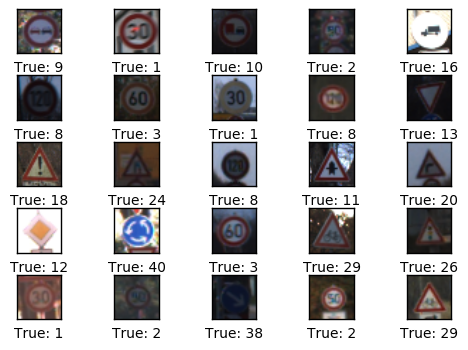

In [22]:
from plot.image_plotter import ImagePlotter

perm = np.arange(data.num_training)
np.random.shuffle(perm)
ImagePlotter.plot_images(images=data.train_orig[perm], labels=data.train_labels[perm], rows=5, columns=5)

##### Validation Set

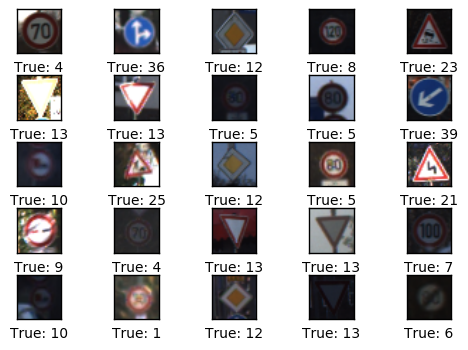

In [23]:
from plot.image_plotter import ImagePlotter

perm = np.arange(data.num_validation)
np.random.shuffle(perm)
ImagePlotter.plot_images(images=data.validate_orig[perm], labels=data.validate_labels[perm], rows=5, columns=5)

##### Testing Set

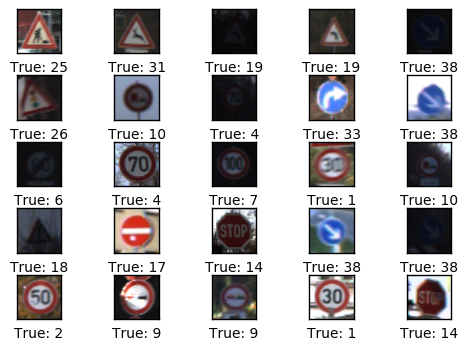

In [25]:
from plot.image_plotter import ImagePlotter

perm = np.arange(data.num_testing)
np.random.shuffle(perm)
ImagePlotter.plot_images(images=data.test_orig[perm], labels=data.test_labels[perm], rows=5, columns=5)

##### My Prediction Set

In [26]:
from plot.image_plotter import ImagePlotter

perm = np.arange(data.num_predicting)
np.random.shuffle(perm)
ImagePlotter.plot_images(images=data.predict_orig[perm], labels=data.predict_labels[perm], rows=5, columns=5)

AttributeError: 'GermanTrafficSignDataset' object has no attribute 'num_predicting'

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Dataset preparation

First, let's construct a fresh German Traffic Sign dataset. Nothing fancy goes on here but things are about to get awesome really quickly. Stay tuned!

In [6]:
from datasets.german_traffic_signs import GermanTrafficSignDataset

data = GermanTrafficSignDataset()

Next, let's configure the dataset. We're going to ask it to set aside 20% of the training dataset for validation purposes when we're training our model. We're also going to ask it to One-Hot Encode the training, validation and test labels so we don't have to do any work later on.

>In code, you'll notice immediately some logs are printed informing us about what it's doing during the configuration process.

In [7]:
# Configure the dataset
data.configure(one_hot=True, train_validate_split_percentage=0.20)

### GermanTrafficSignDataset Code Review

>I encourage you to take a look at the code that went into preprocessing the dataset for network training. Here are some links directly to the code in github, line for line.


###### #configure

[data.configure(one_hot=True, train_validate_split_percentage=0.20)](https://github.com/matthewzimmer/traffic-sign-classification/blob/426c2467a1405ba6ba12c474ccd459f72d392c20/datasets/german_traffic_signs.py#L43-L92 "data.configure(one_hot=True, train_validate_split_percentage=0.20)")



**NOTE:** The following methods are invoked by #configure in sequential order.

###### #__load_data

_Loads in train features and labels and test features and labels from their respective pickle file_

[data.__load_data](https://github.com/matthewzimmer/traffic-sign-classification/blob/426c2467a1405ba6ba12c474ccd459f72d392c20/datasets/german_traffic_signs.py#L233-L252 "data.__load_data")


###### #__split_train_and_validation

_Constructs randomized datasets for training and validation_

[data.__split_train_and_validation](https://github.com/matthewzimmer/traffic-sign-classification/blob/426c2467a1405ba6ba12c474ccd459f72d392c20/datasets/german_traffic_signs.py#L254-L267 "data.__split_train_and_validation")


###### #__compute_metrics

[data.__compute_metrics](https://github.com/matthewzimmer/traffic-sign-classification/blob/426c2467a1405ba6ba12c474ccd459f72d392c20/datasets/german_traffic_signs.py#L269-L276 "data.__compute_metrics")



###### #__prepare_images

_Prepares the images for training, validation, testing and visualization._

[data.__prepare_images](https://github.com/matthewzimmer/traffic-sign-classification/blob/6a82b24a7f262501bf8b1aac832d0f0c18fe5f79/datasets/german_traffic_signs.py#L278-L355 "data.__prepare_images")



###### #__one_hot_encode_labels

_When one-hot encoding is enabled, the train, validate and test labels are one-hot encoded using LabelBinarizer._

[data.__one_hot_encode_labels](https://github.com/matthewzimmer/traffic-sign-classification/blob/c0527a4801c5efc6a351b747b8f544277f30f9eb/datasets/german_traffic_signs.py#L357-L381 "data.__one_hot_encode_labels")

##### Network Walkthrough

Let's define our hyper parameters in advance. We will be feeding this into the network's configuration context later.

```python
from classifiers.base_neural_network import HyperParametersContext

hyper_parameters = HyperParametersContext(
    start_learning_rate=0.2, 
    epochs=10, 
    batch_size=20, 
    required_accuracy_improvement=50
)
```

An instance of ConfigurationContext holds a reference to our GermanTrafficSignDataset instance variable and our HyperParametersContext instance variable.

>This object is required by all _BaseNeuralNetwork_ implementations.

```python
from classifiers.base_neural_network import ConfigurationContext

config = ConfigurationContext(data, hyper_parameters)
```

First thing's first, let's instantiate the SingleLayerLinear neural network class.

```python
from classifiers.linear.single_layer_linear import SingleLayerLinear

simple_nn = SingleLayerLinear()```

Next, let's configure our network passin in our ConfigurationContext instance variable we instantiated above.

This is the principle entry point into all _BaseNeuralNetwork_ implementations. The network will not function without a proper configuration context.

```python
simple_nn.configure(config)```

That was easy! Almost too easy, really. What's actually going on there?

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

Let's print the documentation for the GermanTrafficSignDataset#configure method to uncover the magic and reveal the tecniques I used to preprocess the data.

In [8]:
from IPython.display import Image, display
from IPython.core.display import HTML 
display(Image(url= "doc/GermanTrafficSignDataset_configure_docs.png"))

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

Inside of [data.__split_train_and_validation](https://github.com/matthewzimmer/traffic-sign-classification/blob/426c2467a1405ba6ba12c474ccd459f72d392c20/datasets/german_traffic_signs.py#L254-L267 "data.__split_train_and_validation") I leverage SKLearn's [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) convenience method. It's great because it automatically randomizes the validation set based on a predetermined percentage. I chose the traditional 80/20 split out of habit and felt that if I achieved a high accuracy with 80% of the training data, this should generalize well enough to the other 20% as well as the testing set. 

>**NOTE:** I'm using a fixed random_state number so my testing is relatively predictable and consistent across runs.

```python
def __split_train_and_validation(self):
    """
    Get randomized datasets for training and validation
    """

    self.train_orig, self.validate_orig, self.train_labels, self.validate_labels = train_test_split(
        self.train_orig,
        self.train_labels,
        test_size=self.split_size,
        random_state=832224)

    print(
        'Training features and labels randomized and split with train_test_split (validation % of training set: {})'.format(
            self.split_size))
```

You can also see it hithub [here](https://github.com/matthewzimmer/traffic-sign-classification/blob/7e241e3289a6792cb6ebf2ff051995cdbbd0bdae/datasets/german_traffic_signs.py#L254-L267 "here").

The second phase of splitting my data may be discovered inside of [data.__prepare_images](https://github.com/matthewzimmer/traffic-sign-classification/blob/7e241e3289a6792cb6ebf2ff051995cdbbd0bdae/datasets/german_traffic_signs.py#L278-L355).

In [9]:
from IPython.display import Image, display
from IPython.core.display import HTML 
display(Image(url= "doc/GermanTrafficSignDataset___prepare_images_docs.png"))

Finally, let's print our instance of GermanTrafficSignDataset. It reveals a ton of information about the contents of the **data** variable such as the number and shape of items in each bucket and the traffic sign names corresponding to each label.

In [10]:
print(data)

 
One-Hot Encoded:             True
Train/Validation Split %:    0.2
 
Training size:               31367
Validation size:             7842
Testing size:                12630
Total classes:               43
 
Training orig shape:         (31367, 32, 32, 3)
Training gray shape:         (31367, 32, 32)
Training flat shape:         (31367, 1024)
 
Validation orig shape:       (7842, 32, 32, 3)
Validation gray shape:       (7842, 32, 32)
Validation flat shape:       (7842, 1024)
 
Testing orig shape:          (12630, 32, 32, 3)
Testing gray shape:          (12630, 32, 32)
Testing flat shape:          (12630, 1024)
 
Training label shape:        (31367, 43)
Validation flat label shape: (7842, 43)
Testing gray label shape:    (12630, 43)
 
Sign names:
 
  0 - Speed limit (20km/h)
  1 - Speed limit (30km/h)
  2 - Speed limit (50km/h)
  3 - Speed limit (60km/h)
  4 - Speed limit (70km/h)
  5 - Speed limit (80km/h)
  6 - End of speed limit (80km/h)
  7 - Speed limit (100km/h)
  8 - Speed limit 

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

### Single Layer Linear Neural Network
##### Abstract

The very first network I put together was a single layer linear neural network inspired by the first 
TensorFlow lab we did in class. It allowed me to familiarize myself with Python, Numpy, Matplotlib 
and TensorFlow.

This network implementation achieved a **90.94% validation accuracy** from 20% of the training set data.

> **NOTE** I've never coded in Python until now so it took me longer than desired but I am satisfied with my first attempt.

You can also see it in github [here](https://github.com/matthewzimmer/traffic-sign-classification/blob/c0527a4801c5efc6a351b747b8f544277f30f9eb/classifiers/linear/single_layer_linear.py "here").

##### SingleLayerLinear Class Definition

```python
import tensorflow as tf
import numpy as np
import math
import os

from classifiers.base_neural_network import BaseNeuralNetwork


class SingleLayerLinear(BaseNeuralNetwork):
    def fit(self):
        data = self.config.data
        hyper_parameters = self.config.hyper_parameters

        image_size = data.train_flat.shape[1]
        num_classes = data.num_classes
        num_training = data.num_training

        # Passing global_step to minimize() will increment it at each step.
        global_step = tf.Variable(0, trainable=False)
        initial_learning_rate = hyper_parameters.start_learning_rate
        learning_rate = tf.train.exponential_decay(initial_learning_rate, global_step, 20000, 0.96, staircase=True)

        training_epochs = hyper_parameters.epochs
        batch_size = hyper_parameters.batch_size
        batch_count = int(math.ceil(num_training / batch_size))
        display_step = 1

        n_hidden_layer = 256  # layer number of features

        # Store layers weight & bias
        weights = {
            'hidden_layer': tf.Variable(tf.random_normal([image_size, n_hidden_layer])),
            'out': tf.Variable(tf.random_normal([n_hidden_layer, num_classes]))
        }
        biases = {
            'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer])),
            'out': tf.Variable(tf.random_normal([num_classes]))
        }

        # tf Graph input
        features = tf.placeholder("float", [None, image_size])
        labels = tf.placeholder("float", [None, num_classes])

        # Feed dicts for training, validation, and test session
        train_feed_dict = {features: data.train_flat, labels: data.train_labels}
        valid_feed_dict = {features: data.validate_flat, labels: data.validate_labels}
        test_feed_dict = {features: data.test_flat, labels: data.test_labels}

        # Hidden layer with RELU activation
        layer_1 = tf.add(tf.matmul(features, weights['hidden_layer']), biases['hidden_layer'])
        layer_1 = tf.nn.relu(layer_1)

        # Output layer with linear activation
        logits = tf.matmul(layer_1, weights['out']) + biases['out']

        # Define loss and optimizer
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, labels))
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost,
                                                                                            global_step=global_step)

        init = tf.initialize_all_variables()

        with tf.Session() as sess:
            sess.run(init)
            for epoch in range(training_epochs):
                for i in range(batch_count):
                    x_batch, y_batch, batch_start, batch_end = data.next_batch(batch_size)
                    batch_feed_dict = {features: x_batch, labels: y_batch}
                    sess.run(optimizer, feed_dict=batch_feed_dict)

                # Display logs per epoch step and very last batch iteration
                if epoch % display_step == 0 or (epoch == (training_epochs - 1) and i == (batch_count - 1)):
                    total_iterations = (epoch + 1)

                    self.config.hyper_parameters.end_learning_rate = sess.run(learning_rate)
                    self.cost = sess.run(cost, feed_dict=valid_feed_dict)

                    # Calculate accuracy
                    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
                    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

                    # store accuracies
                    self.train_accuracy = accuracy.eval(train_feed_dict)
                    self.validate_accuracy = accuracy.eval(valid_feed_dict)
                    self.test_accuracy = accuracy.eval(test_feed_dict)

                    # store predictions
                    self.train_predictions = tf.cast(correct_prediction.eval(train_feed_dict), "float").eval()
                    self.test_predictions = tf.cast(correct_prediction.eval(test_feed_dict), "float").eval()
                    self.validate_predictions = tf.cast(correct_prediction.eval(valid_feed_dict), "float").eval()

                    saved = self.evaluate_accuracy(sess, accuracy.eval(valid_feed_dict), total_iterations)
                    if saved == True:
                        # store the final results for later analysis
                        self.weights = {
                            'hidden_layer': weights['hidden_layer'].eval(),
                            'out': weights['out'].eval()
                        }
                        self.biases = {
                            'hidden_layer': biases['hidden_layer'].eval(),
                            'out': biases['out'].eval()
                        }

                if total_iterations - self.last_improvement > hyper_parameters.required_accuracy_improvement:
                    msg = 'No improvement found in a while, stopping optimization after {} iterations. Final accuracy, {} percent at iteration {}.'.format(
                        total_iterations, str(int(self.validate_accuracy * 100)), self.last_improvement)

                    print(msg)

                    break
```

#### Train the model

```python
from datasets.german_traffic_signs import GermanTrafficSignDataset

data = GermanTrafficSignDataset()

# Configure the dataset
data.configure(one_hot=True, train_validate_split_percentage=0.20)
```

In [11]:
from classifiers.linear.single_layer_linear import SingleLayerHyperParametersContext

hyper_parameters = SingleLayerHyperParametersContext(
    hidden_layer_neuron_count=517, # mean of input and output neurons
    start_learning_rate=0.2, 
    epochs=500, 
    batch_size=20, 
    required_accuracy_improvement=50
)

In [12]:
from classifiers.base_neural_network import ConfigurationContext

config = ConfigurationContext(data, hyper_parameters)

In [13]:
from classifiers.linear.single_layer_linear import SingleLayerLinear

simple_nn = SingleLayerLinear()
simple_nn.configure(config)

Uncomment the next line to train the network on your machine. 

>You may want to tune the HyperParametersContext arguments above depending on your computer hardware.

In [14]:
# simple_nn.generate()

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [15]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [16]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

In [17]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.